<b>Problem:</b>
<p>¿Es posible determinar el giro de la siguiente imagen en el dominio de Frecuencias? Se puede enderezar la imagen usando la Transformada de Fourier?:</p>
<img width="30%" src="images/texto.jpg">

<b>Add Required Packages:</b>

In [ ]:
Pkg.add("Images")
Pkg.add("ImageMagick")
Pkg.add("ImageView")
Pkg.add("PyPlot")
kg.add("Gadfly")

Pkg.update()

<b>Adquire Image Function:</b>

In [38]:
function getImgMatrix(file)
    #Adquire Image, convert to Gray and then return a Array{Int32} object
    binImage=convert(Image{Gray},load(file))
    grayImage=raw(binImage)

    imgMatrix = convert(Array{Int32},grayImage)
    return imgMatrix
end

getImgMatrix (generic function with 1 method)

<b>Display Function:</b>

In [39]:
function displayGrayMatrix(imgMatrix)
    imgMatrix2 = convert(Array{Int32},abs(imgMatrix))
    imgOut = convert(Array{UInt8,2},imgMatrix2)
    imgOut = grayim(imgOut)
    display(imgOut)
end

displayGrayMatrix (generic function with 1 method)

<b>Calculate Fourier Transform and Angle of Line A-B with points A=Center and B(max_X,max_Y):</b>

In [65]:
using Images, Colors, FixedPointNumbers, ImageView

imgMatrix =getImgMatrix("images/texto.jpg")

F = fft(imgMatrix)
F = fftshift(F)

out = log(1 + abs(F))

normalized = out - minimum(out);
normalized = (normalized / maximum(normalized)) * 255

normalized = convert(Array{Int32},round(normalized))

displayGrayMatrix(normalized)

rows,cols=size(imgMatrix)

maxVal = 0
maxX = 0
maxY = 0
middleX = 259
middleY = 259

for i=1: rows
    for j=1: cols
        if normalized[j,i]> maxVal
            maxVal = normalized[j,i]
            maxX = i
            maxY = j
        end
    end
end

m = (maxY-middleY) / (maxX-middleX)
angled = rad2deg(atan(m))

println("X: $maxX Y: $maxY - Slope: $m - Angle: $angle")

X: 260 Y: 260 - Slope: 1.0 - Angle: 45.0


<b>Rotate the image given the calculated angle:</b>

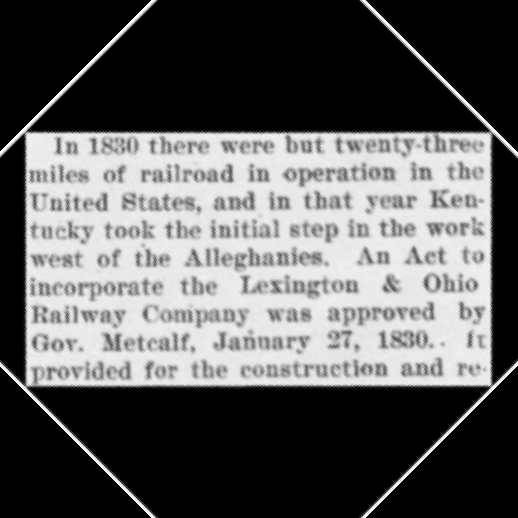

In [85]:
rows,cols=size(imgMatrix)

out=zeros(rows,cols)

angle=deg2rad(angled-90)

for i=1: rows
    for j=1: cols
        x = (i - middleX) * cos(angle) + (j - middleY) * sin(angle)
        y = - (i - middleX) * sin(angle) + (j - middleY) * cos(angle)
        
        x = round(x) + middleX
        y = round(y) + middleY
        
        x = convert(Int32,x)
        y = convert(Int32,y)
        
        if x>=1 && y>=1 && x<=rows && y <= cols
            out[j,i] = imgMatrix[y,x]
        end
    end
end


out

displayGrayMatrix(out)